In [1]:
# Importing Matplotlib
import matplotlib.pyplot as plt
# plt is athe alias name for pyplot
import pandas as pd
# pd is the alias for pandas
import seaborn as sns
# seaborn is aliased as sns
# Importing BeautifulSoup
from bs4 import BeautifulSoup
# Importing Requests
import requests

import warnings
warnings.filterwarnings("ignore")

In [2]:
# URL for scrapping data
url = 'https://www.worldometers.info/geography/how-many-countries-are-there-in-the-world/'

In [3]:
response = requests.get(url) # Getting response form the website 
print(response) # If Respnse is 200, it is a valid response

<Response [200]>


In [4]:
 # parsing the response by using html.parser
soup = BeautifulSoup(response.text, 'html.parser') 
soup # Showing the Soup object


<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--> <html lang="en"> <!--<![endif]--> <head> <meta charset="utf-8"/> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=device-width, initial-scale=1" name="viewport"/> <title>How many countries are there in the world? (2024) - Total &amp; List | Worldometer</title><!-- Favicon --><link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/><link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/><link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/><link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/><link href="/favicon/apple-icon-76x76.png" rel="apple-touch-icon" sizes="76x76"/><link href="/favicon/apple-icon-114x114.png" rel="apple-touch-icon" sizes="114x114"/><link href="/favicon/apple-icon-120x120.png" rel="apple-touch-ico

In [5]:
# Getting data from the soup object
# As there are multiple 'td' tags we can use select method and than use square bracket to get the respective 'td' tag data, and than use .text method to extract the text data from the 'td' tag.
d1=soup.select('td')[0].text
d2=soup.select('td')[1].text
d3=soup.select('td')[2].text
d4=soup.select('td')[3].text
d5=soup.select('td')[4].text
d6=soup.select('td')[5].text
d7=soup.select('td')[6].text
d8=soup.select('td')[7].text
# Printing the first 8 data entries from the 'td' tag
d1,d2,d3,d4,d5,d6,d7,d8

('1',
 'India',
 '1,428,627,663',
 '17.76 %',
 '2,973,190',
 '2',
 'China',
 '1,425,671,352')

In [6]:
# As all the data is in 'td' tag ,using find_all method to get all the 'td' tags
data_iterator = soup.find_all('td')
data_iterator

[<td>1</td>,
 <td style="font-weight: bold; font-size:15px; text-align:left"><a href="/world-population/india-population/">India</a></td>,
 <td style="font-weight: bold;">1,428,627,663</td>,
 <td>17.76 %</td>,
 <td>2,973,190</td>,
 <td>2</td>,
 <td style="font-weight: bold; font-size:15px; text-align:left"><a href="/world-population/china-population/">China</a></td>,
 <td style="font-weight: bold;">1,425,671,352</td>,
 <td>17.72 %</td>,
 <td>9,388,211</td>,
 <td>3</td>,
 <td style="font-weight: bold; font-size:15px; text-align:left"><a href="/world-population/us-population/">United States</a></td>,
 <td style="font-weight: bold;">339,996,563</td>,
 <td>4.23 %</td>,
 <td>9,147,420</td>,
 <td>4</td>,
 <td style="font-weight: bold; font-size:15px; text-align:left"><a href="/world-population/indonesia-population/">Indonesia</a></td>,
 <td style="font-weight: bold;">277,534,122</td>,
 <td>3.45 %</td>,
 <td>1,811,570</td>,
 <td>5</td>,
 <td style="font-weight: bold; font-size:15px; text-alig

In [7]:
len(data_iterator) # Finging the length of data

975

In [8]:
data=[] # Making an empty list 

In [9]:
# Using for loop to itter through the data and using steps as 4, and appending the data in data list 
# Replacing the ',' in confirmed and deaths by '' (i.e removing he ',' from the numbers and converig the data type to int)
for i in range (0,len(data_iterator),5):
        Sr_no = soup.select('td')[i].text
        Country = soup.select('td')[i+1].text
        Population_2020 = soup.select('td')[i+2].text
        World_Share = soup.select('td')[i+3].text
        Land_Area = soup.select('td')[i+4].text
        data.append((
            Sr_no,Country,
            int(Population_2020.replace(',', '')),
            float(World_Share.replace('%', '')),
            int(Land_Area.replace(',', '')),
        ))

In [10]:
data # Showing the Data collected from the website

[('1', 'India', 1428627663, 17.76, 2973190),
 ('2', 'China', 1425671352, 17.72, 9388211),
 ('3', 'United States', 339996563, 4.23, 9147420),
 ('4', 'Indonesia', 277534122, 3.45, 1811570),
 ('5', 'Pakistan', 240485658, 2.99, 770880),
 ('6', 'Nigeria', 223804632, 2.78, 910770),
 ('7', 'Brazil', 216422446, 2.69, 8358140),
 ('8', 'Bangladesh', 172954319, 2.15, 130170),
 ('9', 'Russia', 144444359, 1.8, 16376870),
 ('10', 'Mexico', 128455567, 1.6, 1943950),
 ('11', 'Ethiopia', 126527060, 1.57, 1000000),
 ('12', 'Japan', 123294513, 1.53, 364555),
 ('13', 'Philippines', 117337368, 1.46, 298170),
 ('14', 'Egypt', 112716598, 1.4, 995450),
 ('15', 'DR Congo', 102262808, 1.27, 2267050),
 ('16', 'Vietnam', 98858950, 1.23, 310070),
 ('17', 'Iran', 89172767, 1.11, 1628550),
 ('18', 'Turkey', 85816199, 1.07, 769630),
 ('19', 'Germany', 83294633, 1.04, 348560),
 ('20', 'Thailand', 71801279, 0.89, 510890),
 ('21', 'United Kingdom', 67736802, 0.84, 241930),
 ('22', 'Tanzania', 67438106, 0.84, 885800),
 (

In [11]:
# create DataFrame using data by defining thecolumn headers
df = pd.DataFrame(data, columns =['Sr_no','Country','Population(2020)','World_Share(%)','Land_Area_Km²'])

In [12]:
df.head() #Showing top 5 entries from the data

,Sr_no,Country,Population(2020),World_Share(%),Land_Area_Km²
0,1,India,1428627663,17.76,2973190
1,2,China,1425671352,17.72,9388211
2,3,United States,339996563,4.23,9147420
3,4,Indonesia,277534122,3.45,1811570
4,5,Pakistan,240485658,2.99,770880


In [13]:
# saving the dataframe
df.to_csv('WorldPopulation_2020_data.csv', index=False)

In [14]:
df.columns

Index(['Sr_no', 'Country', 'Population(2020)', 'World_Share(%)',
       'Land_Area_Km²'],
      dtype='object')

## Analyzing the Data

A. Make a Scatter plot by using Seaborn and Matplotlib of 'Population(2020) vs Land_Area_Km²' and apply the following customization.
- Make the Figure size (8,6)
- Make a scatter plot such as x='Population(2020)',y='Land_Area_Km²',palette='Set1'
- Add a title to the Plot with fontsize = 15 and color = purple as 'Population(2020) vs Land_Area_Km²'
- Add Grid to the plot using grid() function
- Also Show the plot

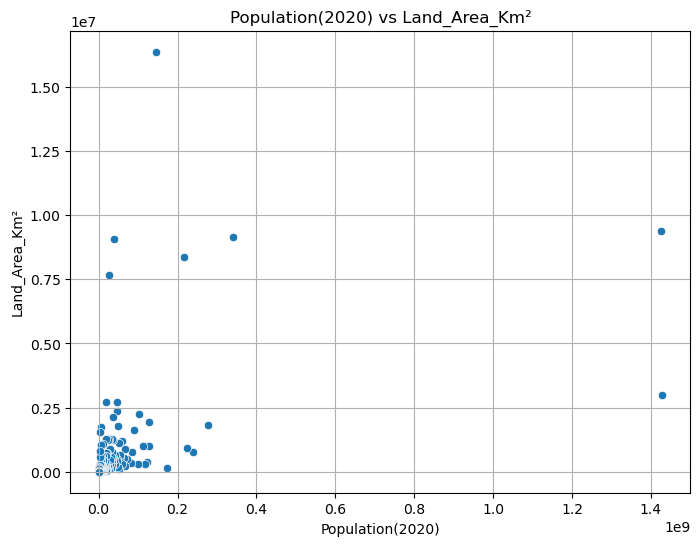

In [15]:
plt.figure(figsize=(8,6)) # setting plot figure size
# Plotting a scatter plot and applying customization
sns.scatterplot(data=df,x='Population(2020)',y='Land_Area_Km²',palette='Set1')
# Setting title for the plot
plt.title('Population(2020) vs Land_Area_Km²')
plt.grid() # Showing grid for the plot 
plt.show()# Showing the plot

In [16]:
# Top 5 Countries by Population(2020) , Using nlargest function of pandas
df_top_5=df.nlargest(n=5, columns=['Population(2020)'])
df_top_5

,Sr_no,Country,Population(2020),World_Share(%),Land_Area_Km²
0,1,India,1428627663,17.76,2973190
1,2,China,1425671352,17.72,9388211
2,3,United States,339996563,4.23,9147420
3,4,Indonesia,277534122,3.45,1811570
4,5,Pakistan,240485658,2.99,770880


B. Create a Line  plot of 'Country wise Population(2020)' of top 5 countries based on population and apply the Following customization to the plot.
- Make a plot by setting figure size (10,6) using seaborn set() function.
- Set the color palette for the plot using the set_palette() function as "tab10".
- Set the style for the plot using the set_style() function as "darkgrid".
- Set the context  for the plot using set_cotext() function with following customization ("paper", font_scale = 2, rc={"grid.linewidth": 0.5}).
- Make a Bar plot using seaborn barplot() function setting x='Country',y='Population(2020)'.
- Add the title to the plot as 'Country wise Population(2020)'.
- Add X-label as 'Country' and Y-label as 'Country wise Population(2020)'
- Make the Xticks rotate 45 degrees.
- Show the plot using show() function of matplotlib

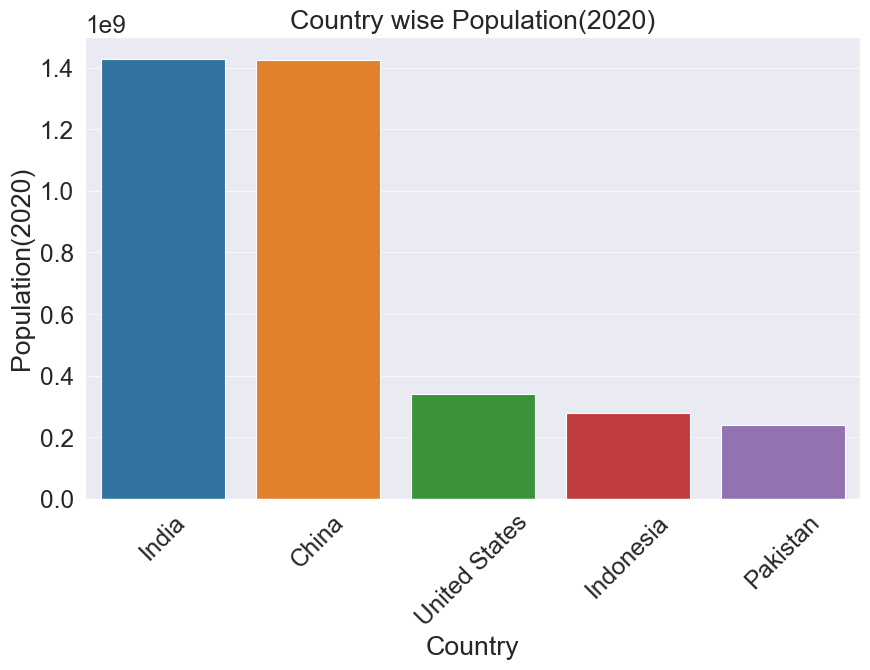

In [17]:
# Setting the figure size for the plot
sns.set(rc={'figure.figsize':(10,6)})
# setting color palette for the plot
sns.set_palette("tab10")
# Setting background for the plot (setting grid style)
sns.set_style('darkgrid')
# setting figure style, font scale and grid line width for the plot
sns.set_context("paper", font_scale = 2, rc={"grid.linewidth": 0.5})
# Plotting a Bar plot
sns.barplot(data=df_top_5, x='Country',y='Population(2020)')
# Setting title for the plot
plt.title('Country wise Population(2020)')
plt.xlabel('Country') # setting x-label
plt.ylabel('Population(2020)')  # setting y-label
# Rotating x-label by 45 degrees
plt.xticks(rotation=45)
# Showing the plot
plt.show()

C. Create a Line plot of 'Country vs Land_Area_Km² for top 5 countries by population' and apply the Following customization to the plot.
- Make the Figure size (15,8)
- Make line/markers color 'indigo'
- Make line width as 2 and line style as '-.'
- Add label as Land_Area_Km²
- Add markers as 'o' with markersize = 10 
- Add a title to the Plot with fontsize = 15 and color = purple
- Add X-Label as Country & Y-Label as Land_Area_Km²
- Add Grid to the plot using grid() function
- Show the legend for the plot using legend() funct
- Also Show the plot

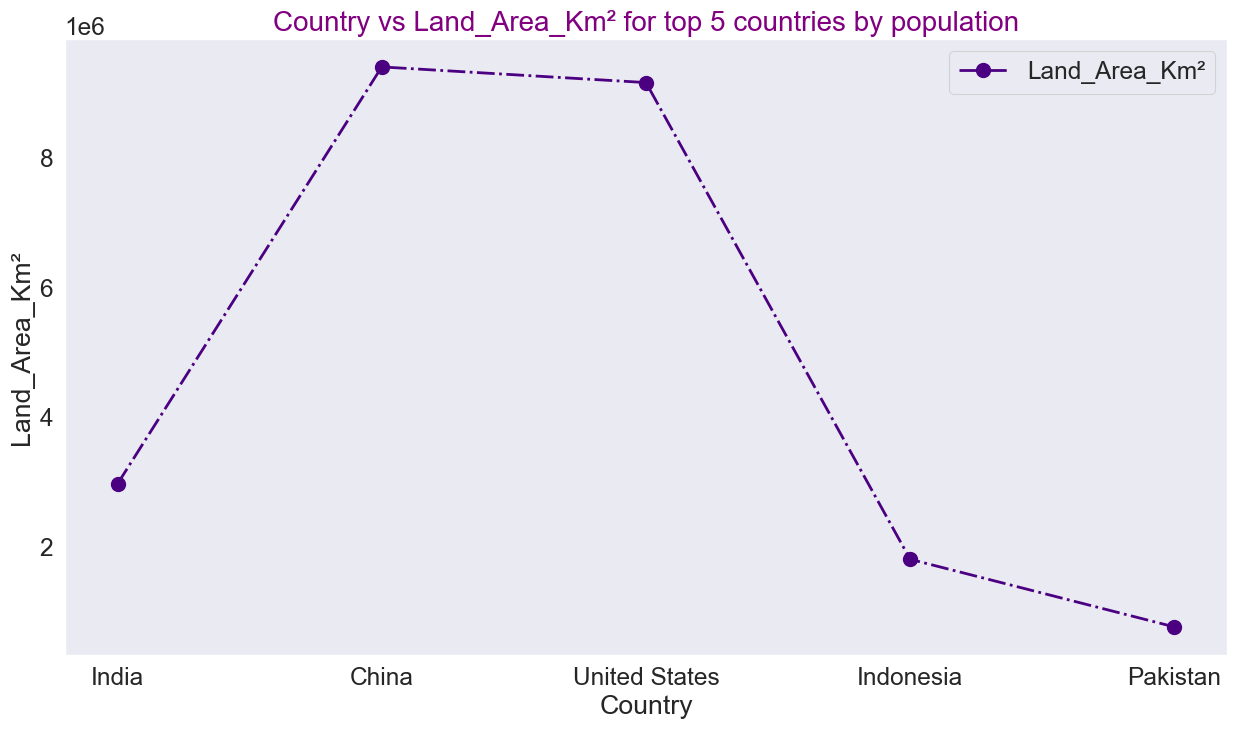

In [18]:
# Creating a line  plot and applying customization
plt.figure(figsize=(15,8)) # setting plt figure
# Customizing plot by setting line color, marker, label, markersize, linewidth(lw) and linestyle
plt.plot(df_top_5['Country'],df_top_5['Land_Area_Km²'],color='indigo',marker='o',
         label='Land_Area_Km²',markersize=10,lw=2,linestyle='-.')
plt.xlabel('Country') # Setting x-label
plt.ylabel('Land_Area_Km²') # Setting y-label
plt.legend() # Slowing Legend for the plot
# Setting title for the plot
plt.title('Country vs Land_Area_Km² for top 5 countries by population',fontsize=20,color='purple') 
plt.grid() # Showing grid for the plot 
plt.show() # Showing the plot